## Simulation
### 1. Data Generating Process
- Network: Randomly assigned to clusters
- Covariate: (1) Multivariate Normal iid across units in a cluster; (2) Bernoulli iid across units in a cluster
- Individual Treatment: Logistic model
- Number of treated neigbours: (1) Real number of treated neighbours based on network structure. (2) Fake number of treated neighbours generated with multinomial logit.
- Outcome: $ Y_i = \alpha + \tau * Z_i + \gamma * G_i * Z_i + X_{i}^c * \beta + \epsilon_i$

### 2. Estimation
#### (1) $\tau(g)$
$$ \tau(g) = \frac{1}{N} \sum_{c=1}^{M} \sum_{i=1}^{n} \frac{ \boldsymbol{1}\{G_{i,c}=g \}}{\hat{p}_{i,g}(X_{c,i}, X_{c,(i)})} \left( \frac{Z_{c,i}Y_{c,i}}{ \hat{p}_{i,1}(X_{c,i}, X_{c,(i)}) }  - \frac{(1-Z_{c,i})Y_{c,i}}{ \hat{p}_{i,0}(X_{c,i}, X_{c,(i)}) } \right) $$
#### (2) Standard Error
The efficiency bound is:
$$ \begin{align} \label{var_bound}
    & \frac{1}{n}\sum_{i=1}^{n}\mathbb{E}\left[\frac{\sigma_{i,1,g}^{2}(X_c)}{p_{i,g}(X_c)q_{i}(X_c)}+\frac{\sigma_{i,0,g}^{2}(X_c)}{p_{i,g}(Xc)(1-q_{i}(X_{c,i}))}+(\beta_{i,g}(X_c)-\beta_{i,g})^{2}\right]\\
  &+\frac{1}{n^{2}}\sum_{i\neq j}\mathbb{E}\left[(\beta_{i,g}(X_c)-\beta_{i,g})(\beta_{j,g}(X_c)-\beta_{j,g})\right] \nonumber  
\end{align}
$$
We compared three different standard errors.
- Empirical Standard Error: $$ Var = \frac{1}{N} \sum_{c=1}^{M} \sum_{i=1}^{n} \left( \frac{ \boldsymbol{1}\{G_{i,c}=g \}}{\hat{p}_{i,g}(X_{c,i}, X_{c,(i)})} \left( \frac{Z_{c,i}Y_{c,i}}{ \hat{p}_{i,1}(X_{c,i}, X_{c,(i)}) }  - \frac{(1-Z_{c,i})Y_{c,i}}{ \hat{p}_{i,0}(X_{c,i}, X_{c,(i)}) } \right) - \tau(g) \right)^2 $$
$$  se = \sqrt{\frac{Var}{N-1}}$$ 
- Using plug in estimator: By our DGS, we have $\beta_{i,g}(X_c)-\beta_{i,g} = 0$. The bound becomes
$$ \frac{1}{n}\sum_{i=1}^{n}\mathbb{E}\left[\frac{\sigma_{i,1,g}^{2}(X_c)}{p_{i,g}(X_c)q_{i}(X_c)}+\frac{\sigma_{i,0,g}^{2}(X_c)}{p_{i,g}(Xc)(1-q_{i}(X_{c,i}))}\right] $$ Estimate $\sigma_{i,z,g}^{2}(X_c)$ with OLS. Plug in estimated propensity score.
- Using ground truth: Plug in true propensity score and $\sigma_{i,0,g}^{2}(X_c)$.



In [2]:
from estimate import Estimate
from simulation import Simulation
from utils import Params
import matplotlib.pyplot as plt
import numpy as np
    

def run(n=2000, N=15000, M=5000, gamma = 0.1, K=1, fakeG=True, normalX=False):
    n_g = int(N/M)
    z, z_est, z_thm, taug = np.zeros((n,n_g)), np.zeros((n,n_g)), np.zeros((n,n_g)), np.zeros((n,n_g))
    p = Params(N,M,K)
    p.gamma = gamma
    p.normalX = normalX
    p.fakeG = fakeG
    for i in range(n):
        s = Simulation(p)
        _ = s.get_data()
        result = Estimate(s).est()
        z[i,:] = result['z']
        z_est[i,:] = result['z est']
        z_thm[i,:] = result['z thm']
        taug[i,:] = result['tau(g)']
    return z, z_est, z_thm, taug

In [6]:
from scipy.stats import norm

def plot(z, title):
    fig = plt.figure(figsize=(5*z.shape[1],3))
    for i in range(z.shape[1]):
        plt.subplot(1, z.shape[1], i+1)
        plt.hist(z[:,i], range=(-3,3), density=True, bins='auto')
        x = np.linspace(-3,3)
        pdf = norm.pdf(x)
        plt.plot(x,pdf)
        plt.title("tau({})".format(i))
    plt.suptitle(title, y=1)
    plt.show()

In [3]:
z, z_est, z_thm, taug = run()

Baseline Model: 2000 traces of simulation, 5000 number of clusters of size 3, 1 dimensional Bernoulli covariate.


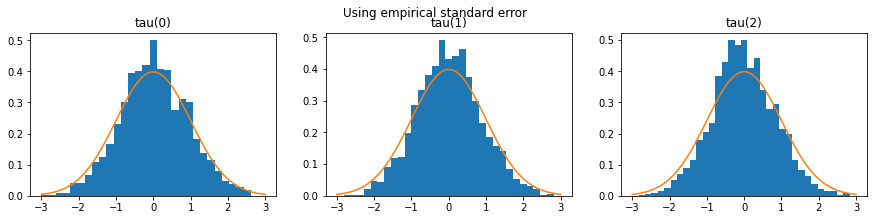

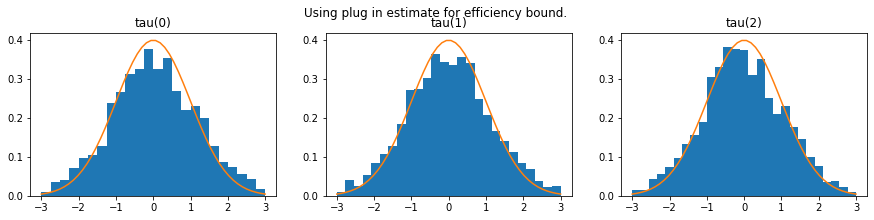

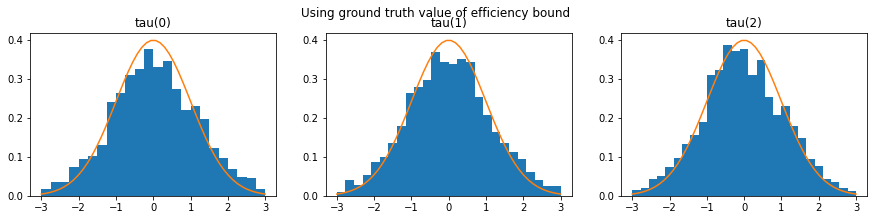

In [4]:
print("Baseline Model: 2000 traces of simulation, 5000 number of clusters of size 3, 1 dimensional Bernoulli covariate.")
plot(z, "Using empirical standard error")
plot(z_est, "Using plug in estimate for efficiency bound.")
plot(z_thm, "Using ground truth value of efficiency bound")

In [5]:
z, z_est, z_thm, taug = run(fakeG=False)

Baseline Model with real G.


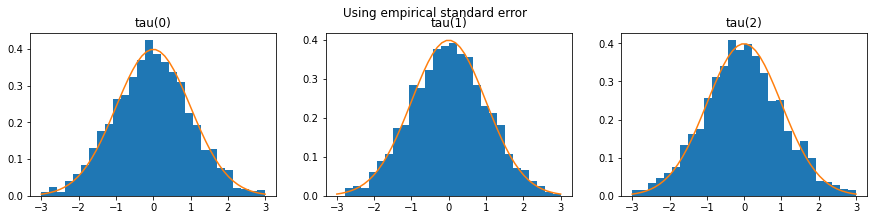

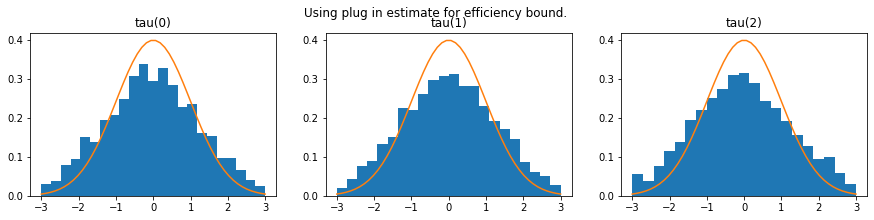

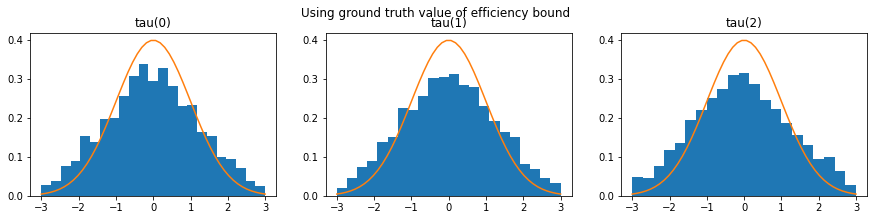

In [6]:
print("Baseline Model with real G.")
plot(z, "Using empirical standard error")
plot(z_est, "Using plug in estimate for efficiency bound.")
plot(z_thm, "Using ground truth value of efficiency bound")

In [7]:
z, z_est, z_thm, taug = run(gamma=1)

Baseline Model with larger gamma.


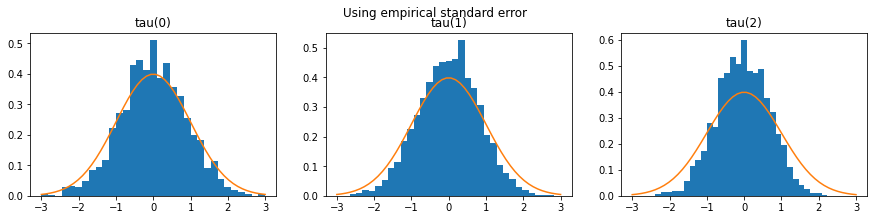

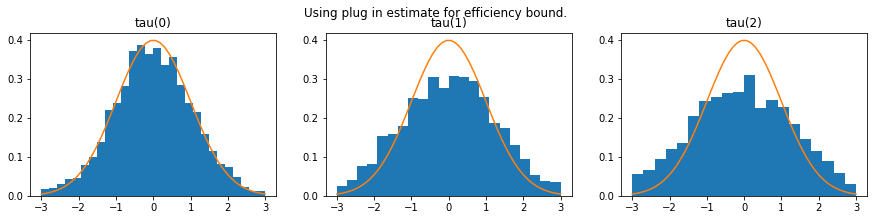

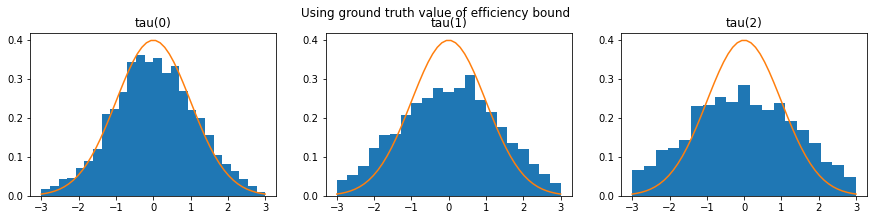

In [8]:
print("Baseline Model with larger gamma.")
plot(z, "Using empirical standard error")
plot(z_est, "Using plug in estimate for efficiency bound.")
plot(z_thm, "Using ground truth value of efficiency bound")

In [9]:
z, z_est, z_thm, taug = run(N=6000, M=2000)

Baseline Model with smaller sample size.


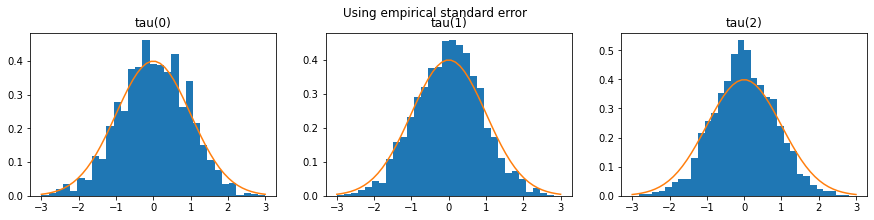

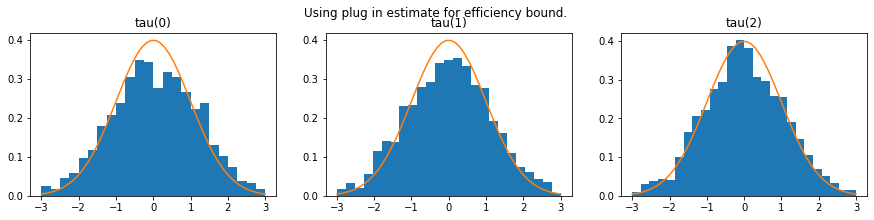

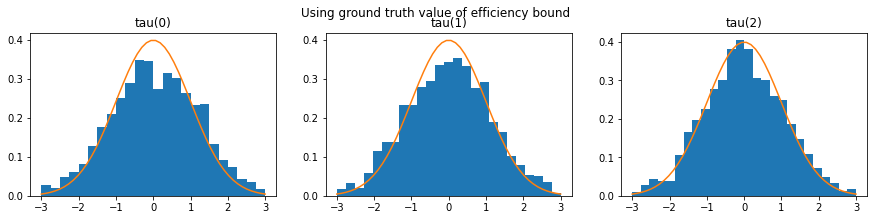

In [10]:
print("Baseline Model with smaller sample size.")
plot(z, "Using empirical standard error")
plot(z_est, "Using plug in estimate for efficiency bound.")
plot(z_thm, "Using ground truth value of efficiency bound")

In [11]:
z, z_est, z_thm, taug = run(normalX=False, K=3)

Baseline Model with 3 dimensional Binary Covariate.


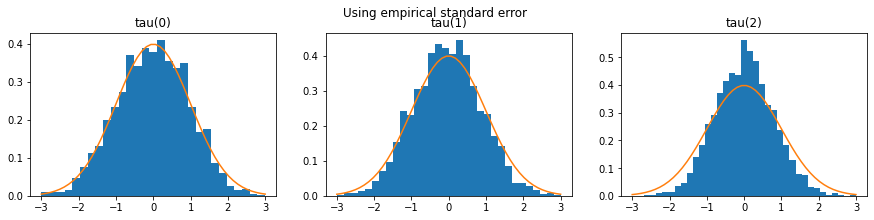

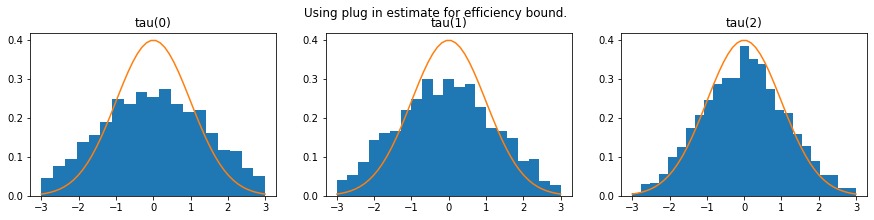

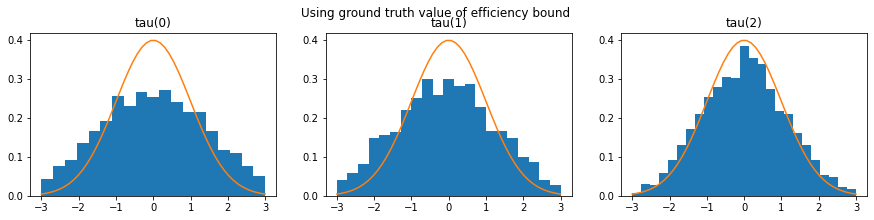

In [12]:
print("Baseline Model with 3 dimensional Binary Covariate.")
plot(z, "Using empirical standard error")
plot(z_est, "Using plug in estimate for efficiency bound.")
plot(z_thm, "Using ground truth value of efficiency bound")

In [13]:
z, z_est, z_thm, taug = run(normalX=True)

/Users/liujizhou/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/liujizhou/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/Users/liujizhou/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/liujizhou/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Baseline Model with Normal Covariates.


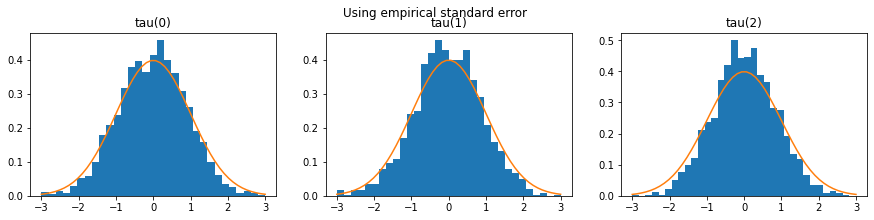

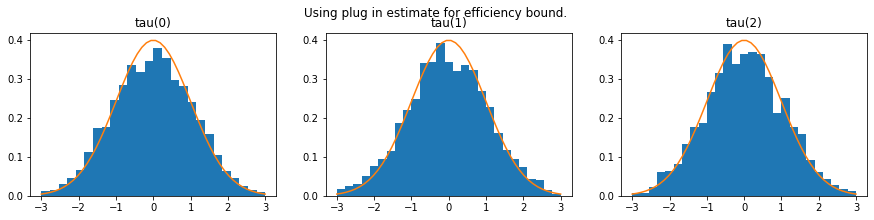

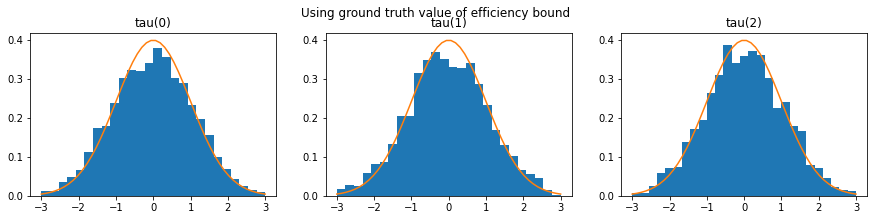

In [14]:
print("Baseline Model with Normal Covariates.")
plot(z, "Using empirical standard error")
plot(z_est, "Using plug in estimate for efficiency bound.")
plot(z_thm, "Using ground truth value of efficiency bound")

In [15]:
z, z_est, z_thm, taug = run(normalX=True, K=3)

Baseline Model with More Normal Covariates.


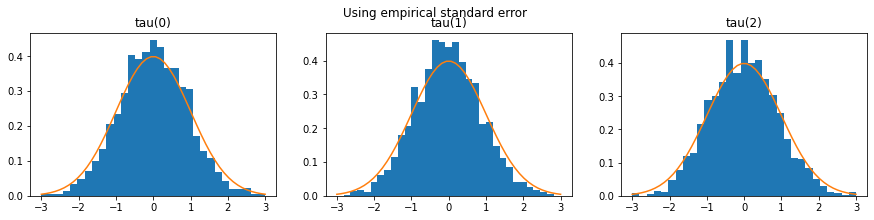

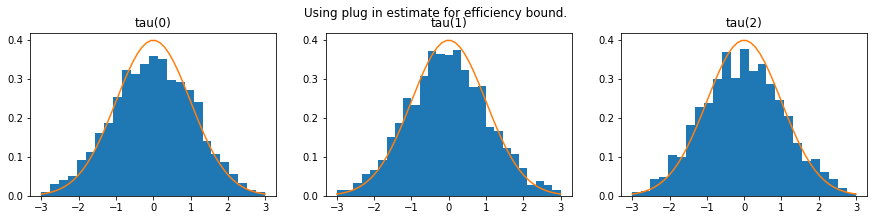

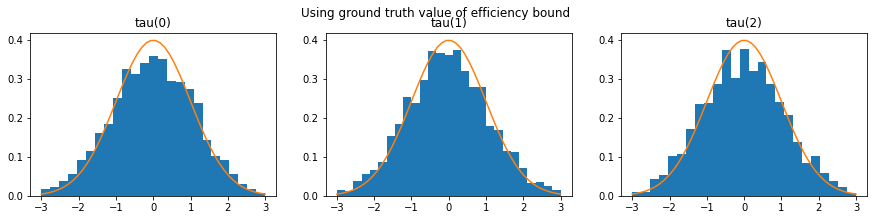

In [16]:
print("Baseline Model with More Normal Covariates.")
plot(z, "Using empirical standard error")
plot(z_est, "Using plug in estimate for efficiency bound.")
plot(z_thm, "Using ground truth value of efficiency bound")

In [17]:
z, z_est, z_thm, taug = run(N=10000, M=2000, normalX=True)

Baseline Model with larger g and Normal X.


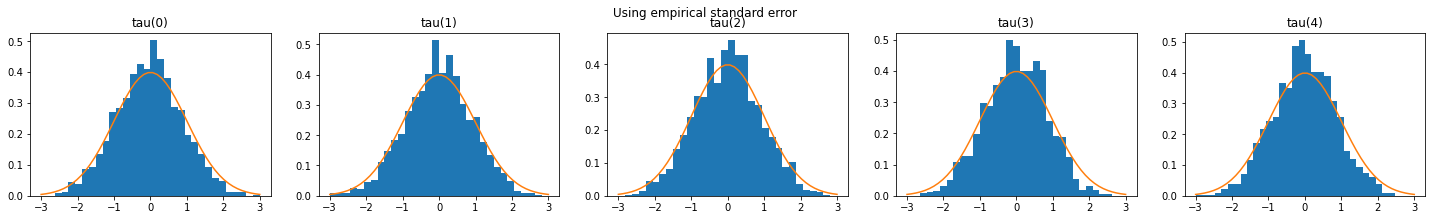

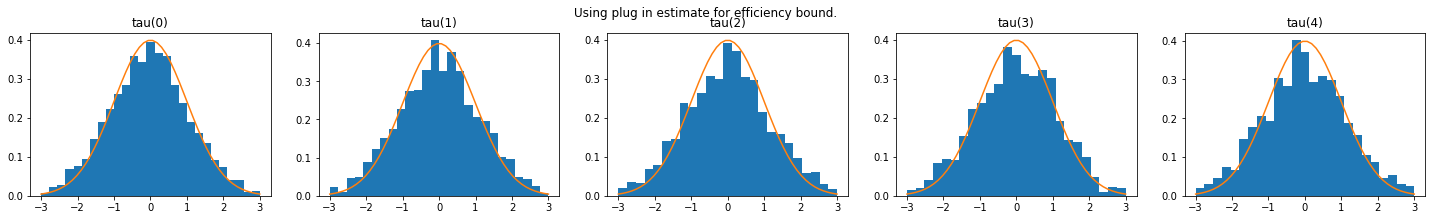

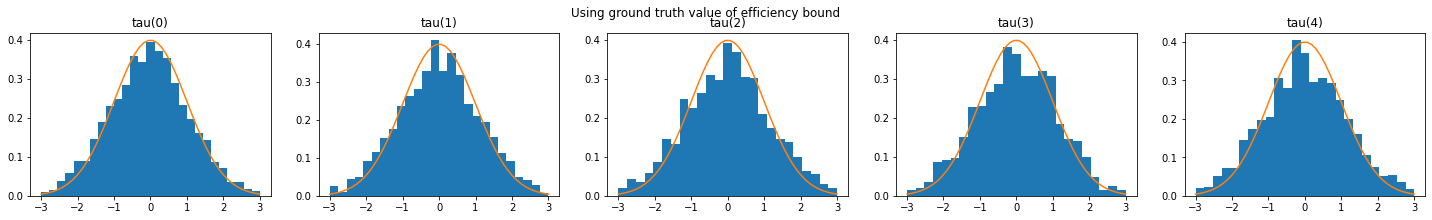

In [18]:
print("Baseline Model with larger g and Normal X.")
plot(z, "Using empirical standard error")
plot(z_est, "Using plug in estimate for efficiency bound.")
plot(z_thm, "Using ground truth value of efficiency bound")

In [22]:
z, z_est, z_thm, taug = run(N=10000, M=2000, normalX=True, fakeG=False)

Baseline Model with g=10, Normal X (closer to correct specification), real G.


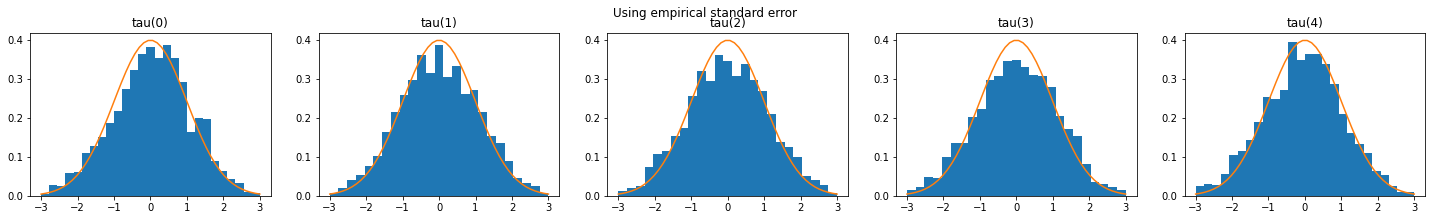

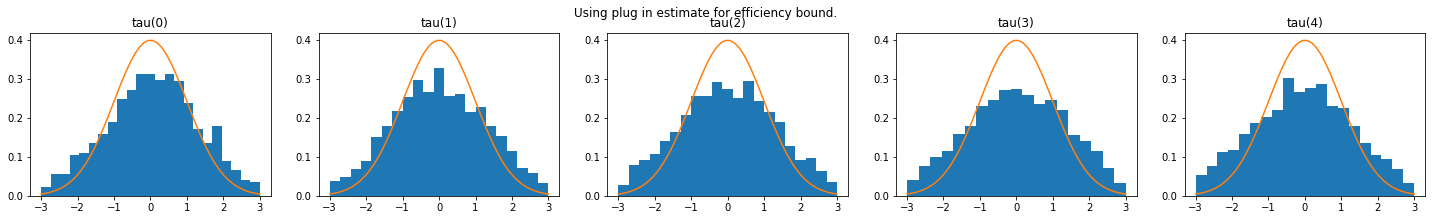

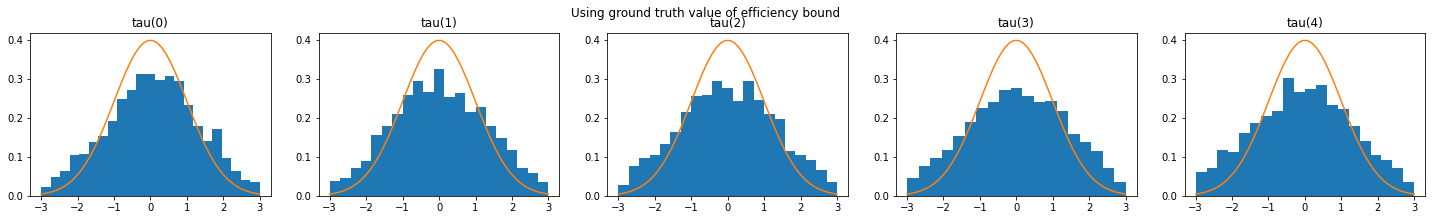

In [23]:
print("Baseline Model with g=5, Normal X (closer to correct specification), real G.")
plot(z, "Using empirical standard error")
plot(z_est, "Using plug in estimate for efficiency bound.")
plot(z_thm, "Using ground truth value of efficiency bound")

In [24]:
z, z_est, z_thm, taug = run(N=20000, M=2000, normalX=True, fakeG=False)

Baseline Model with g=10, Normal X (closer to correct specification), real G.


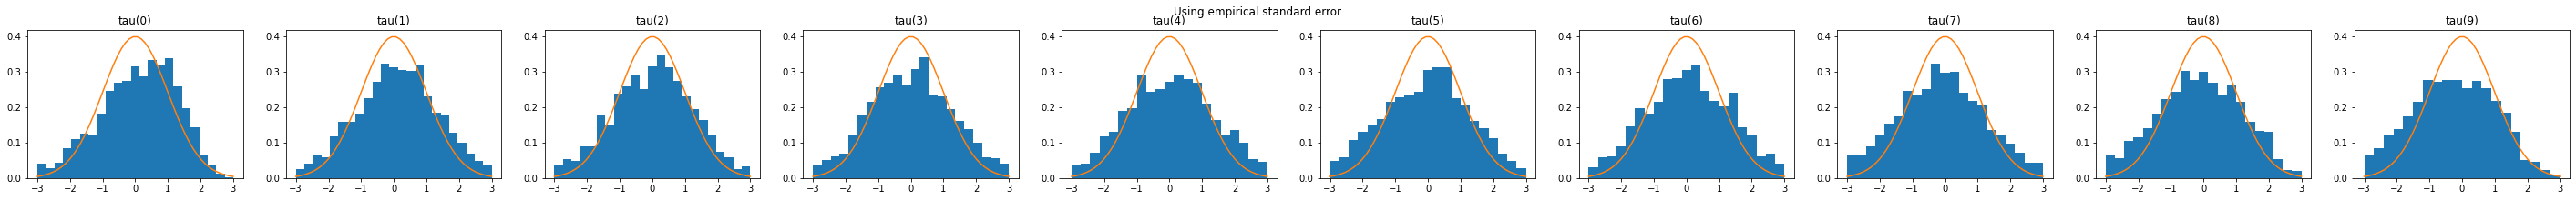

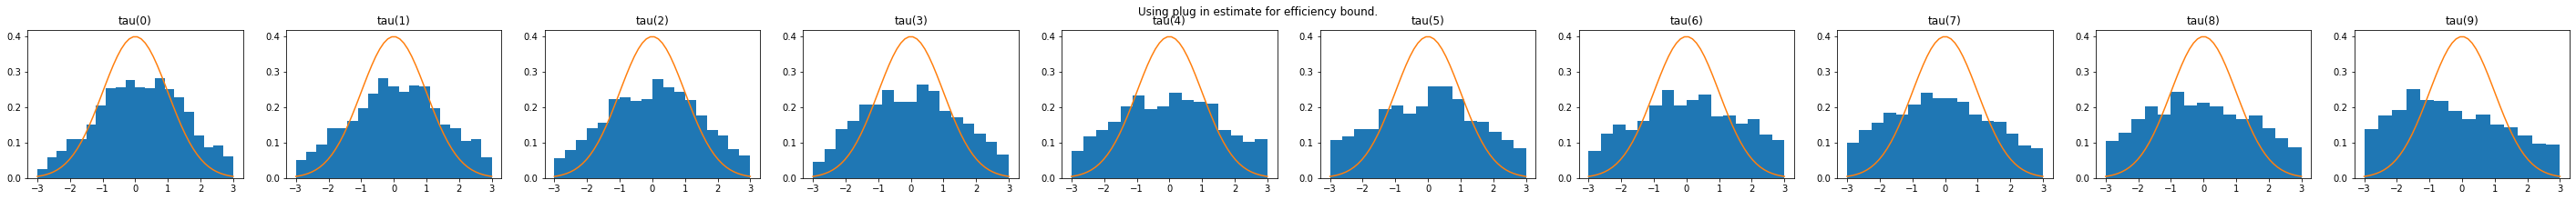

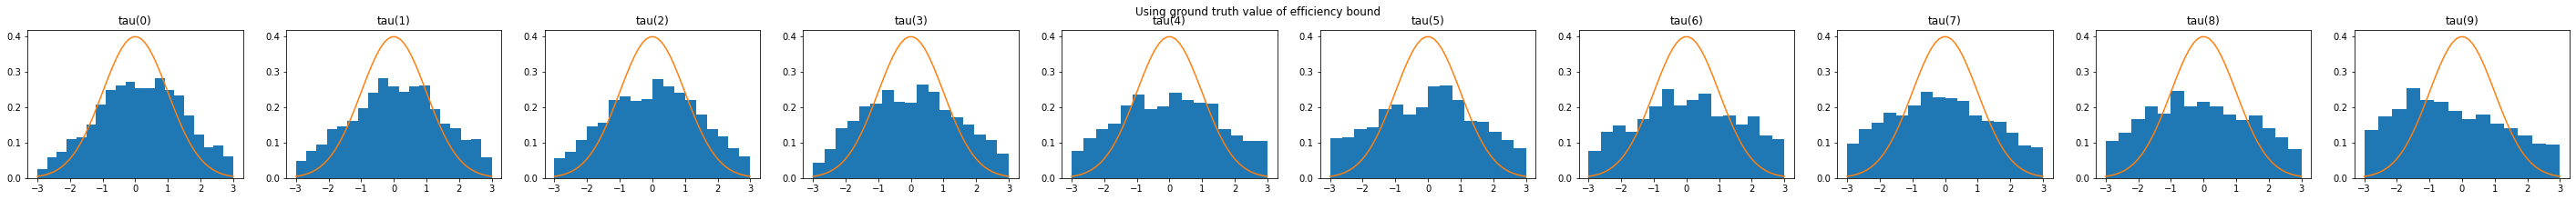

In [25]:
print("Baseline Model with g=10, Normal X (closer to correct specification), real G.")
plot(z, "Using empirical standard error")
plot(z_est, "Using plug in estimate for efficiency bound.")
plot(z_thm, "Using ground truth value of efficiency bound")

In [30]:
z, z_est, z_thm, taug = run(N=10000, M=2000, normalX=True, gamma=5)

Baseline Model with g=5, Normal X (closer to correct specification), gamma=5


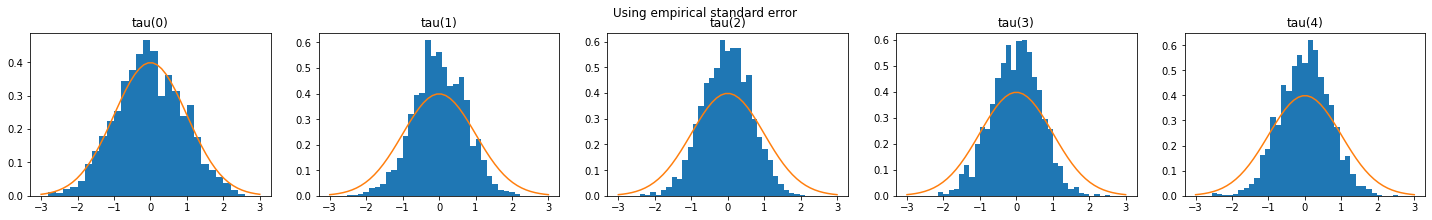

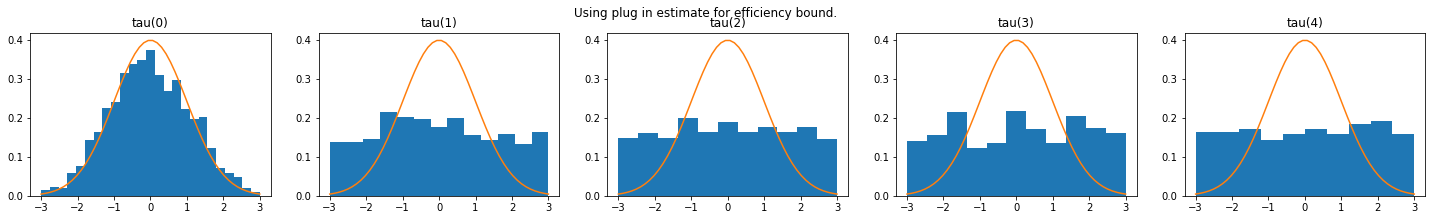

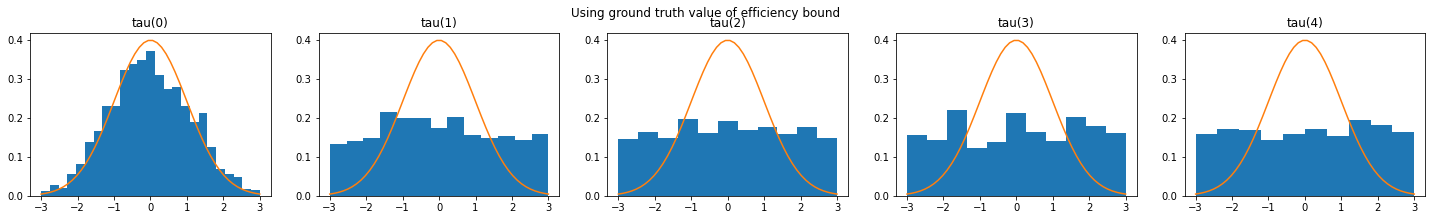

In [31]:
print("Baseline Model with g=5, Normal X (closer to correct specification), gamma=5")
plot(z, "Using empirical standard error")
plot(z_est, "Using plug in estimate for efficiency bound.")
plot(z_thm, "Using ground truth value of efficiency bound")

### 2. Convergence of 3 different Variance Estimators

In [12]:
def get_variances(M=10000, gamma = 0.1, K=1, fakeG=True, normalX=True, n=10, raw=False):
    se, se_est, se_thm = np.zeros((n,3)), np.zeros((n,3)), np.zeros((n,3))
    N = M*3
    for i in range(n):
        p = Params(N,M,K)
        p.gamma = gamma
        p.normalX = normalX
        p.fakeG = fakeG
        s = Simulation(p)
        _ = s.get_data()
        result = Estimate(s).est()
        se[i,:] = result['se']**2 * N
        se_est[i,:] = result['se est']**2 * N
        se_thm[i,:] = result['se thm']**2 * N
    if raw:
        return se, se_est, se_thm
    else:
        return np.mean(se,axis=0), np.mean(se_est,axis=0), np.mean(se_thm,axis=0)

    
def get_convergence(n_lower=1000, n_upper=10000, step_size=1000):
    i = 0
    n_curr = n_lower
    num_trials = int(n_upper/n_lower)
    se_taug0, se_taug1, se_taug2 = np.zeros((num_trials,3)), np.zeros((num_trials,3)), np.zeros((num_trials,3))
    n_clusters = np.zeros(num_trials)
    while n_curr <= n_upper:
        print("Current number of clusters: {}.".format(n_curr))
        se, se_est, se_thm = get_variances(M=n_curr)
        se_taug0[i,0], se_taug0[i,1], se_taug0[i,2] = se[0], se_est[0], se_thm[0]
        se_taug1[i,0], se_taug1[i,1], se_taug1[i,2] = se[1], se_est[1], se_thm[1]
        se_taug2[i,0], se_taug2[i,1], se_taug2[i,2] = se[2], se_est[2], se_thm[2]
        n_clusters[i] = n_curr
        n_curr += step_size
        i += 1
    return se_taug0, se_taug1, se_taug2, n_clusters


se_taug0, se_taug1, se_taug2, n_clusters = get_convergence()
labels = ["Empirical", "Plug-in Estimates", "Ground truth"]

Current number of clusters: 1000.
Current number of clusters: 2000.
Current number of clusters: 3000.
Current number of clusters: 4000.
Current number of clusters: 5000.
Current number of clusters: 6000.
Current number of clusters: 7000.
Current number of clusters: 8000.
Current number of clusters: 9000.
Current number of clusters: 10000.


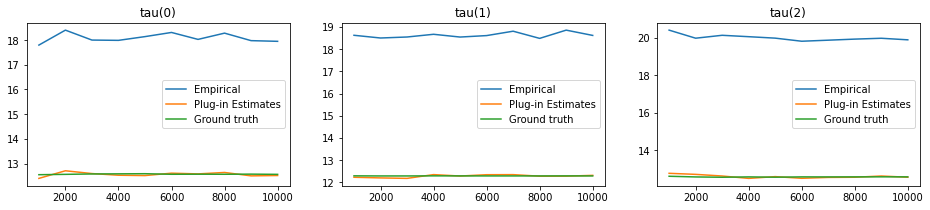

In [13]:
fig = plt.figure(figsize=(16,3))

plt.subplot(1, 3, 1)
plt.title("tau(0)")
for i in range(3):
    plt.plot(n_clusters, se_taug0[:,i], label=labels[i])
    plt.legend()

plt.subplot(1, 3, 2)
plt.title("tau(1)")
for i in range(3):
    plt.plot(n_clusters, se_taug1[:,i], label=labels[i])
    plt.legend()
    
plt.subplot(1, 3, 3)
plt.title("tau(2)")
for i in range(3):
    plt.plot(n_clusters, se_taug2[:,i], label=labels[i])
    plt.legend()

## 3. Gamma being large breaks the results

[2.22333517e+02 2.61980140e+03 7.80973712e+03 1.55035000e+04
 2.55303541e+04 3.55936566e+04 4.71705072e+04 6.12040417e+04
 7.77777472e+04 9.44253080e+04 1.06807397e+05 1.20456973e+05
 1.38838873e+05 1.50648938e+05 1.63651606e+05 1.77555870e+05
 1.97032589e+05 2.06359030e+05 2.27120511e+05 2.36051846e+05]
[11.783204979258914, 2.9810416597004603, 1.9851500388796737, 1.646747776577773, 1.3941701101834643, 1.3252503880267577, 1.2975065436824211, 1.270794298107691, 1.2140401503255913, 1.131131046356149, 1.1277961618750119, 1.152601379750461, 1.0850630963426287, 1.086311051866955, 1.0849625923146098, 1.1096934618274588, 1.0473345099549844, 1.1006085440520748, 1.0393242115157477]


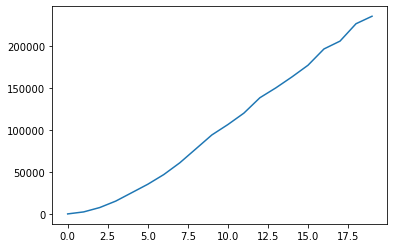

In [6]:
N=100000
M=5000
gamma = 5
K=1
fakeG=True 
normalX=False
p = Params(N,M,K)
p.gamma = gamma
p.betaXc = p.betaXc - p.betaXc
p.normalX = normalX
p.fakeG = fakeG
s = Simulation(p)
_ = s.get_data()
e = Estimate(s)
result = e.est()
plt.plot(result['bound_empirical'])
print(result['bound_empirical'])
print([result['bound_empirical'][i+1]/result['bound_empirical'][i] for i in range(int(N/M)-1)])